# Maximize Alignment Area Thread
a. stein 6.21.2023

Attempt to find like droughts via maximizing alignment area

In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

from tqdm.autonotebook import tqdm

/pool0/data/steinjao/drought/drought_impact/notebooks/explore/drought_threads/../../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Load in Data

In [2]:
dnet_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet'

In [3]:
exp_tag = 'f25k_d1_rt20p_paired'

In [4]:
usdm_net = dnet.DroughtNetwork.unpickle(f'{dnet_path}/USDM_net_{exp_tag}.pickle')

In [5]:
spi30d_net = dnet.DroughtNetwork.unpickle(f'{dnet_path}/spi_30d_net_{exp_tag}.pickle')

In [6]:
spi180d_net = dnet.DroughtNetwork.unpickle(f'{dnet_path}/spi_180d_net_{exp_tag}.pickle')

## Compute AA

Going to cheat here and simplify the search for AA maximum

In [9]:
usdm_array = usdm_net.to_array()

In [10]:
spi30d_array = spi30d_net.to_array()

In [32]:
spi180d_array = spi180d_net.to_array()

Check start times

In [13]:
usdm_net.nodes[0].time

6

In [14]:
spi30d_net.nodes[0].time

1

In [17]:
summed_array = usdm_array + spi30d_array[5:, :, :]

In [27]:
aligned_area = (summed_array == 2).sum(axis=(1,2))
total_area = (summed_array > 0).sum(axis=(1,2))
aligned_fraction = aligned_area/total_area

Text(0.5, 1.0, 'Alignment between UDM and SPI30d')

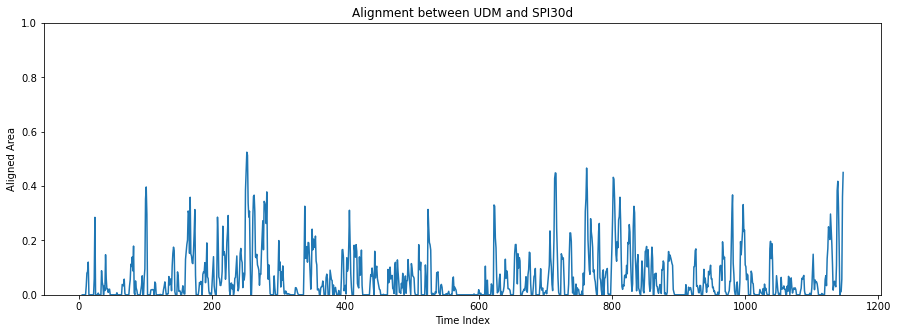

In [34]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(np.arange(len(aligned_fraction))+5, aligned_fraction)
ax.set_ylim(0,1)
ax.set_ylabel('Aligned Area')
ax.set_xlabel('Time Index')
ax.set_title('Alignment between UDM and SPI30d')

So, not even on a thread-by-thread basis, the greatest fraction of area shared is 0.5 ... which is not really something I'd call the same drought if only half overlapped.

In [48]:
paired_ds = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')
usdm_dates = paired_ds['USDM Date'].values
spi_dates = paired_ds['SPI Date'].values

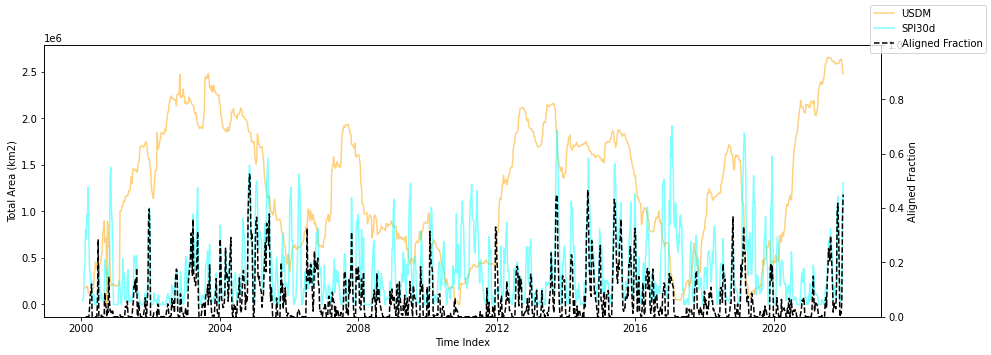

In [49]:
fig, ax = plt.subplots(figsize=(15,5))

usdm_cells = (usdm_array > 0).sum(axis=(1,2))
spi30d_cells = (spi30d_array > 0).sum(axis=(1,2))

ax.plot(usdm_dates[np.arange(len(usdm_cells))+6], usdm_cells*18.1, color='orange', label='USDM',alpha=0.5)
ax.plot(usdm_dates[np.arange(len(spi30d_cells))+1], spi30d_cells*18.1, color='cyan', label='SPI30d',alpha=0.5)
ax.set_xlabel('Time Index')
ax.set_ylabel('Total Area (km2)')

ax_twin = ax.twinx()

ax_twin.plot(usdm_dates[np.arange(len(aligned_fraction))+6], aligned_fraction, color='k', label='Aligned Fraction', linestyle='--')
ax_twin.set_ylim(0,1)
ax_twin.set_ylabel('Aligned Fraction')

fig.legend()

to be thorough, let's pull out where there are maximums

In [50]:
aligned_fraction.argmax()

247

In [57]:
usdm_dates[247]

numpy.datetime64('2004-09-28T00:00:00.000000000')

Text(0.5, 1.0, 'SPI30d')

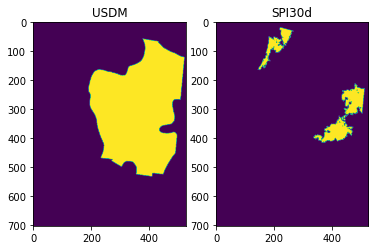

In [53]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(usdm_array[247, :, :])
ax[0].set_title('USDM')
ax[1].imshow(spi30d_array[247, :, :])
ax[1].set_title('SPI30d')

Yeah I would not call those the same drought.